In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles
from upsetplot import UpSet, from_contents
plt.figure(figsize=(16,10))
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

<Figure size 1152x720 with 0 Axes>

In [3]:
hATAC = pd.read_csv('data/hATAC_Dec_05_22.csv', index_col=0)
hATAC.columns = ['CHROM', 'FROM','TO','ID']
mATAC = pd.read_csv('data/mm10_hg38_cm_result.csv', index_col=0)
mATAC.columns = ['CHROM', 'FROM','TO', 'start_idx','end_idx','ID','length']
mATAC_hATAC = pd.read_excel('data/mATAC_hATAC_Dec_12_22.xlsx', index_col=0, engine='openpyxl')


# Interval analysis
The following notebook analyse the gnomical intervals which were obtained with ATAC expiremint. one on human cells (hATAC) and other on mouse (mATAC). <br>


Table of content :
- common intervals-<br> Check how many unique and common interval the ATAC seq of each experiment outputed
- length analysis- <br> Analyse how many common and unique basepair each expriment have

## pre-procesing the data

## common intervals <a class='anchor' id='common'></a>
The shared amount of intervals between hATAC to mATAC

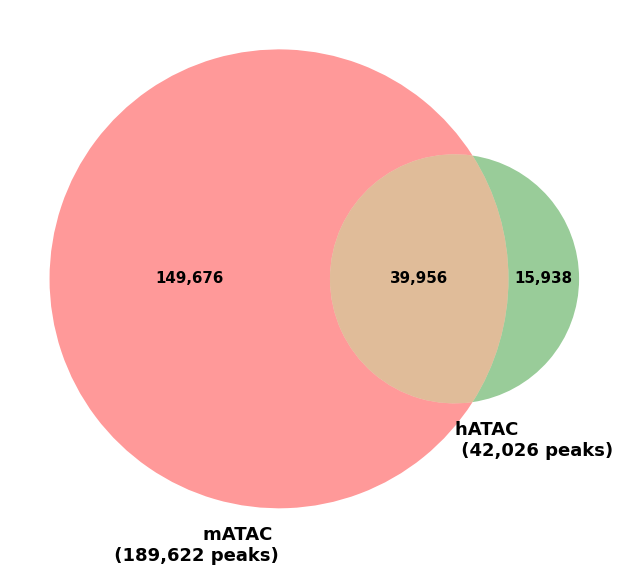

In [8]:
hATAC_peaks = hATAC.shape[0]
mATAC_peaks = mATAC.shape[0]
both_peaks = mATAC_hATAC.shape[0]
plt.figure(figsize=(16,10))

v = venn2(subsets=(mATAC_peaks -  mATAC_hATAC.mATAC_id.drop_duplicates().shape[0],
                   hATAC_peaks - mATAC_hATAC.hATAC_id.drop_duplicates().shape[0],
                   both_peaks),
           set_labels = (f'mATAC \n ({mATAC_peaks:,} peaks)',
                        f'hATAC \n ({hATAC_peaks:,} peaks)'))

v.get_label_by_id('10').set_text(f'{mATAC_peaks -  mATAC_hATAC.mATAC_id.drop_duplicates().shape[0]:,}')
v.get_label_by_id('01').set_text(f'{ hATAC_peaks - mATAC_hATAC.hATAC_id.drop_duplicates().shape[0]:,}')
v.get_label_by_id('11').set_text(f'{both_peaks:,}')

plt.savefig('interval_count.png')

# Problem with Venn diagram

As you can see, the numbers does not match the other numbers we have got. <br>
The source of this problem is that some peaks were intersected to more than 1 peak in the other experiment <br>
example: <br>
chr1:100-200 hATAC1 <br>
chr1:100-120 mATAC1 <br>
chr1:170-210 mATAC2 <br>

Both of the mATAC peaks intersects with hATAC1, this causes the odd numbers. <br>
I'll use upstream diagram to show intersection of the peaks number:

In [47]:
len(set(hATAC.ID[~hATAC.ID.isin(mATAC_hATAC.hATAC_id)].tolist() + mATAC_hATAC.new_id[~mATAC_hATAC.hATAC_id.duplicated()].tolist()))

42026

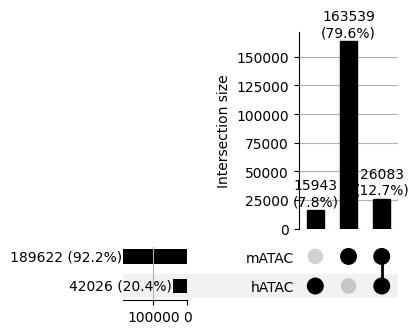

In [58]:
hATAC_set = set(hATAC.ID[~hATAC.ID.isin(mATAC_hATAC.hATAC_id)].tolist() + mATAC_hATAC.new_id[~mATAC_hATAC.hATAC_id.duplicated()].tolist())
mATAC_set = set(mATAC.ID[~mATAC.ID.isin(mATAC_hATAC.mATAC_id)].tolist() + mATAC_hATAC.new_id[~mATAC_hATAC.mATAC_id.duplicated()].tolist())
source_dict = {'hATAC': hATAC_set,
              'mATAC':mATAC_set,}

# plots = UpSet(from_contents(source_dict),
#              subset_size='count',
#              sort_categories_by=None,
#              min_subset_size=0,
#              show_counts=True,
#             show_percentages=True)

from matplotlib import pyplot as plt
from upsetplot import generate_counts, plot
table = from_contents(source_dict)
fig = plt.figure(figsize=(20,20), dpi=100)
plot = plot(table,
            fig=fig,
     subset_size='count',
     sort_categories_by=None,
     min_subset_size=0,
     show_counts=True,
     show_percentages=True)

# plt.savefig('interval_count_upstream.png',dpi=199)

## plot explanation:
on the left bottom side, there are the total number of peaks in each set, mATAC peaks, hATAC peaks. <br>
The percentage of the group is written as well, **it does sum to 100% - <br> the mATAC peaks + the unique peaks from the hATAC (15938) sums to 100%** <br>


the upper bar plot shows the amount of peaks that are unique to an intersection between the groups with black dots in the lower section. <br>
e.g.: hATAC have in total 42,026, out of them 15943 does not intersect with any peak from mATAC,and 26,083 peaks does.

**I'm Sorry but I couldnt find how to change the format of the numbers  **

## length analysis <a class='anchor' id='length'></a>

the shared amount of BP between hATAC to mATAC

In [51]:
tot_hATAC = (hATAC.TO - hATAC.FROM).sum()
tot_mATAC = (mATAC.TO - mATAC.FROM).sum()
tot_both = (both.TO - both.FROM).sum()


12795955

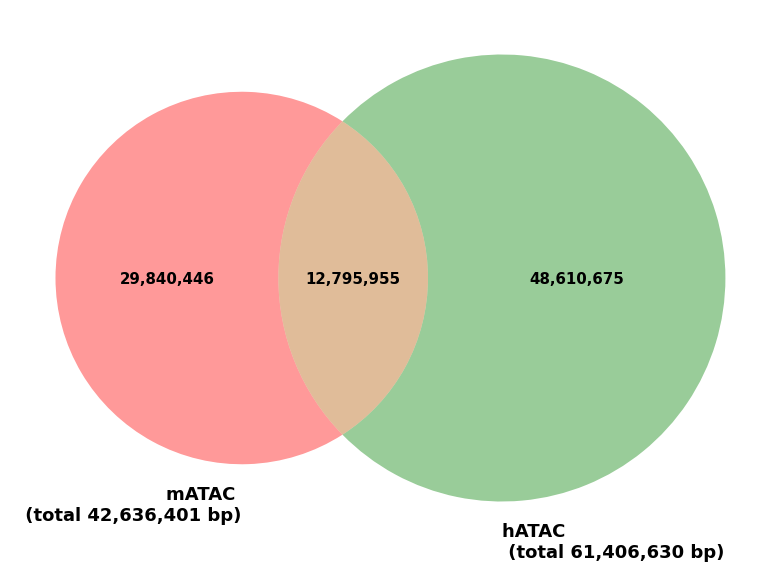

In [70]:
plt.figure(figsize=(16,10))
v = venn2(subsets=(tot_mATAC - tot_both, tot_hATAC - tot_both, tot_both),
           set_labels = (f'mATAC \n (total {tot_mATAC:,} bp)',
                        f'hATAC \n (total {tot_hATAC:,} bp)'))
v.get_label_by_id('10').set_text(f'{tot_mATAC - tot_both:,}')
v.get_label_by_id('01').set_text(f'{tot_hATAC - tot_both:,}')
v.get_label_by_id('11').set_text(f'{tot_both:,}')
plt.savefig('bp_count.png')